In [2]:
# Importing necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np   # numpy is used for numerical computations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler     # For scaling numerical features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # To evaluate the model
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns           # For making statistical graphics

# Load the dataset
try:
    data = pd.read_csv('diabetes_dataset.csv')
except FileNotFoundError:
    print("Error: diabetes_dataset.csv not found.  Make sure the file is in the same directory as your notebook, or provide the correct path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

In [3]:
# Display the first few rows of the dataframe to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Data Cleaning (if needed - handling outliers or incorrect data types)
# For simplicity, we'll skip complex cleaning for now, but in a real project, this is crucial

# Feature Engineering (creating new features if needed)
# For this example, we will skip feature engineering

# Select features (X) and target variable (y)
# 'Outcome' is our target variable - whether or not someone has diabetes
X = data.drop('Outcome', axis=1)  # Features: all columns except 'Outcome'
y = data['Outcome']               # Target: 'Outcome' column

# Split data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
# StandardScaler scales features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform
X_test = scaler.transform(X_test)       # Transform test data using the fitted scaler

# Initialize and train the Logistic Regression model
# Logistic Regression is a linear model used for binary classification
model = LogisticRegression(random_state=42) #initialize the model
model.fit(X_train, y_train) # Train the model using training data




First 5 rows of the dataset:
   Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0   69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1   32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2   89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3   78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4   38            8  24.56    103.2           74.0    4.7  102.5  29.1   

   Triglycerides  WaistCircumference  HipCircumference   WHR  FamilyHistory  \
0           50.0                90.5             107.9  0.84              0   
1          129.9               113.3              81.4  1.39              0   
2          177.6                84.7             107.2  0.79              0   
3          117.0               108.9             110.0  0.99              0   
4          145.9                84.1              92.8  0.91              0   

   DietType  Hypertension  MedicationUse  Outcome  

LogisticRegression(random_state=42)


Model Evaluation:
Accuracy: 0.9931865828092243

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1275
           1       1.00      0.98      0.99       633

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908


Confusion Matrix:
[[1274    1]
 [  12  621]]


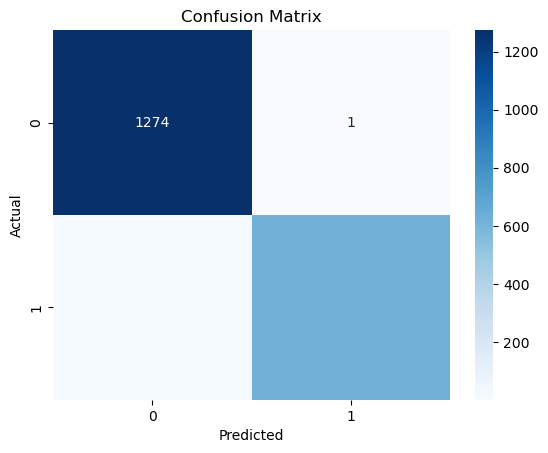

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred)) # Overall accuracy of the model

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix to visualize True Positives, True Negatives, False Positives, and False Negatives
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the Confusion Matrix using Seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
# Example of predicting for a new patient
# The values should be preprocessed (scaled) in the same way as the training data
new_patient_data = np.array([60, 5, 30.0, 120.0, 80.0, 5.0, 100.0, 50.0, 150.0, 90.0, 100.0, 0.9, 0, 1, 0, 0]).reshape(1, -1)
new_patient_data_scaled = scaler.transform(new_patient_data)
prediction = model.predict(new_patient_data_scaled)

print("\nPrediction for a new patient:", prediction[0])
if prediction[0] == 1:
    print("The model predicts this patient has diabetes.")
else:
    print("The model predicts this patient does not have diabetes.")


Prediction for a new patient: 0
The model predicts this patient does not have diabetes.


C:\Users\elvir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
